Name: Qi Li

Student ID: 1005299302

Course: INF2178-Experimental Design for Data Science

Instructor: Shion Guha

Content: Technical Assignment III

## Python

In [ ]:
import pandas as pd
%pip install dfply
from dfply import *
import seaborn as sns
import matplotlib.pyplot as plt

%pip install pingouin
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Load data
df=pd.read_csv("INF2178_A3_data.csv")
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [ ]:
# summary statistics for dependent variable
df >> group_by(X.incomegroup) >> \
summarize(n=X['fallmathscore'].count(), mean=X['fallmathscore'].mean(), std=X['fallmathscore'].std())

,incomegroup,n,mean,std
0,1,4729,23.924504,7.642412
1,2,3726,27.568468,8.541161
2,3,3478,31.012720,9.930977


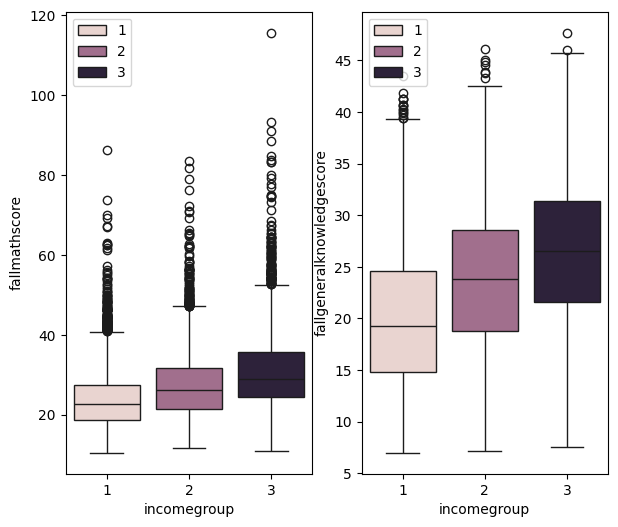

In [ ]:
fig,axs = plt.subplots(ncols=2,figsize=(7, 6))
sns.boxplot(data=df, x="incomegroup", y="fallmathscore", hue=df.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[1])
plt.show()

In [ ]:
ancova(data=df, dv='fallmathscore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,11585.864980,2,111.928370,6.927877e-49,0.018420
1,fallgeneralknowledgescore,273412.600276,1,5282.752173,0.000000e+00,0.306927
2,Residual,617393.889005,11929,NaN,NaN,NaN


In [ ]:
# Perform the ANCOVA with Ordinary Least Square method
model = ols('fallmathscore ~ incomegroup + fallgeneralknowledgescore', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     3619.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:34:52   Log-Likelihood:                -40481.
No. Observations:               11933   AIC:                         8.097e+04
Df Residuals:                   11930   BIC:                         8.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The adjusted R-squared equals 0.337, indicating a relatively samll proportion of the variation explained by the model. I will be adding an additional covariate to improve the explanatory power.

In [ ]:
# Fit ANCOVA model with additional covariate
model = sm.formula.ols('fallmathscore ~ incomegroup + fallreadingscore + fallgeneralknowledgescore', data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     5717.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:35:01   Log-Likelihood:                -37994.
No. Observations:               11933   AIC:                         7.600e+04
Df Residuals:                   11929   BIC:                         7.602e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('fallmathscore ~ incomegroup * fallgeneralknowledgescore+ fallreadingscore', data=df).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4291.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:35:09   Log-Likelihood:                -37990.
No. Observations:               11933   AIC:                         7.599e+04
Df Residuals:                   11928   BIC:                         7.603e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

The main effect of income group become insignificant after introducing the interaction term. It implies that the effect of income group on math scores depends on the level of general knowledge scores.

A similar situation doesn't happen when the income group variable interacts with reading scores.

In [ ]:
# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('fallmathscore ~ incomegroup * fallreadingscore + fallgeneralknowledgescore', data=df).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     4310.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:38:03   Log-Likelihood:                -37975.
No. Observations:               11933   AIC:                         7.596e+04
Df Residuals:                   11928   BIC:                         7.600e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## R

In [ ]:
#ancova in R
install.packages("ggpubr")
library(tidyverse)
library(ggpubr)
library(rstatix)
library(broom)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
data <- read.csv("INF2178_A3_data.csv")
head(data)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,36.58,39.54,33.822,49.37,50.10,40.533,140000,140,3
2,50.82,44.44,38.147,83.50,58.93,37.409,120000,120,3
3,40.68,28.57,28.108,40.41,32.81,29.312,90000,90,3
4,32.57,23.57,15.404,34.14,35.25,27.382,50000,50,2
5,31.98,19.65,18.727,32.84,23.60,26.977,55000,55,2
6,50.45,36.27,33.352,64.13,53.31,32.703,150000,150,3


In [ ]:
data$incomegroup <- as.factor(data$incomegroup)
head(data)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,36.58,39.54,33.822,49.37,50.10,40.533,140000,140,3
2,50.82,44.44,38.147,83.50,58.93,37.409,120000,120,3
3,40.68,28.57,28.108,40.41,32.81,29.312,90000,90,3
4,32.57,23.57,15.404,34.14,35.25,27.382,50000,50,2
5,31.98,19.65,18.727,32.84,23.60,26.977,55000,55,2
6,50.45,36.27,33.352,64.13,53.31,32.703,150000,150,3


Warning message:
“The dot-dot notation (`..eq.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(eq.label)` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


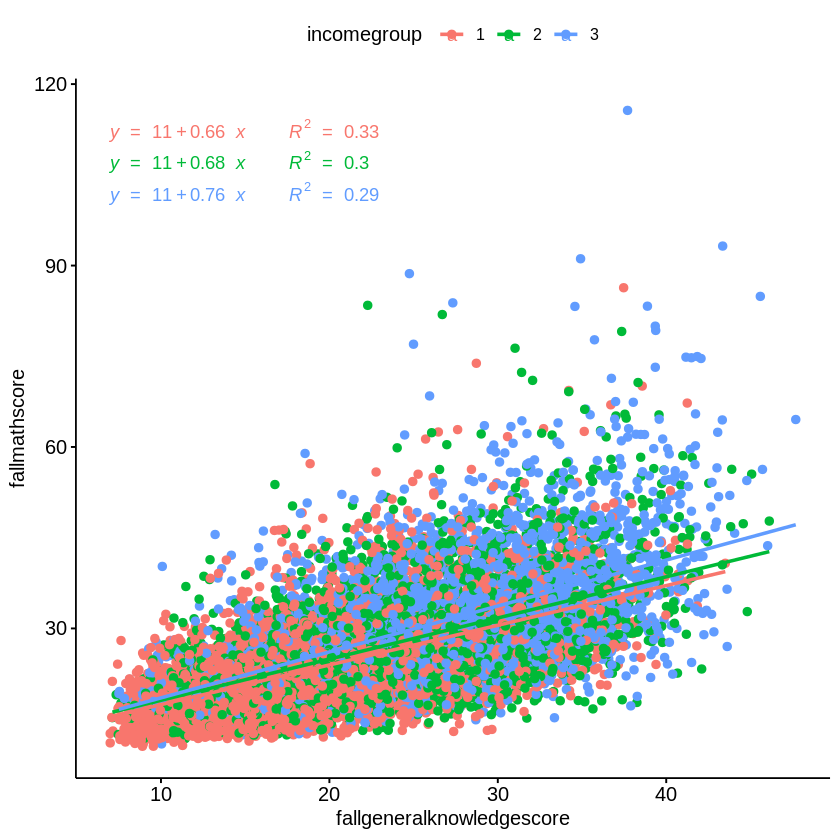

In [ ]:
# Create scatter plot with fitted regression lines
ggscatter(
  data, x = "fallgeneralknowledgescore", y = "fallmathscore",
  color = "incomegroup", add = "reg.line"
  )+
  stat_regline_equation(
    aes(label =  paste(..eq.label.., ..rr.label.., sep = "~~~~"), color = incomegroup)
    )

Some differences are observed between the fitted regression lines for different income groups. We need to further examine whether these differences are significant.

In addition, there is little difference in the regression coefficient between each income group. This conforms the fix-x assumption of ANCOVA.

In [ ]:
# ANOVA to test the significance of the independent variables and their interaction, in predicting the dependent variable.
data %>% anova_test(fallmathscore ~ incomegroup*fallgeneralknowledgescore)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,incomegroup,2,11927,112.106,5.82e-49,*,0.018
2,fallgeneralknowledgescore,1,11927,5291.155,0.00e+00,*,0.307
3,incomegroup:fallgeneralknowledgescore,2,11927,10.487,2.82e-05,*,0.002


In [ ]:
# Fit the model, the covariate goes first
model <- lm(fallmathscore ~ fallgeneralknowledgescore + incomegroup, data = data)

In [ ]:
model.metrics <- augment(model)

In [ ]:
# Understand the plot by inspecting individual points
head(model.metrics, 3)

fallmathscore,fallgeneralknowledgescore,incomegroup,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39.54,33.822,3,36.14201,3.397991,0.0003837483,7.194379,2.141934e-05,0.4724180
44.44,38.147,3,39.15201,5.287987,0.0005298224,7.194283,7.163959e-05,0.7352353
28.57,28.108,3,32.16532,-3.595324,0.0002923805,7.194371,1.826671e-05,-0.4998301


In [ ]:
# Assess normality of residuals using shapiro wilk test
set.seed(1005299302)
shapiro_test(sample(model.metrics$.resid,5000))

variable,statistic,p.value
<chr>,<dbl>,<dbl>
"sample(model.metrics$.resid, 5000)",0.9285139,9.924572e-44


Small p-value provides strong evidence against the null hypothesis of normal distribution.

In [ ]:
# Levene's test when the population is not normally distributed
model.metrics %>% levene_test(.resid ~ incomegroup)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,11930,81.12423,1.013027e-35


The assumption of homogeneity of variances is not met either. However, ANOVA is quite robust to violation of these two assumptions, particularly for larger sample sizes.

In [ ]:
res.aov <- data %>% anova_test(fallmathscore ~ fallgeneralknowledgescore + incomegroup)
get_anova_table(res.aov)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,fallgeneralknowledgescore,1,11929,5282.752,0.00e+00,*,0.307
2,incomegroup,2,11929,111.928,6.93e-49,*,0.018


In [ ]:
install.packages("emmeans")
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’




In [ ]:
# Want to compare the group means conditional on the continuous variable
pwc <- data %>%
  emmeans_test(
    fallmathscore ~ incomegroup, covariate = fallgeneralknowledgescore ,
    p.adjust.method = "bonferroni"
    )
pwc

,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,fallgeneralknowledgescore*incomegroup,fallmathscore,1,2,11929,-5.564928,2.679181e-08,8.037542e-08,****
2,fallgeneralknowledgescore*incomegroup,fallmathscore,1,3,11929,-14.862992,1.588335e-49,4.765006e-49,****
3,fallgeneralknowledgescore*incomegroup,fallmathscore,2,3,11929,-9.684706,4.223559e-22,1.267068e-21,****


In [ ]:
# Display the adjusted means of each group
# Also called as the estimated marginal means (emmeans)
get_emmeans(pwc)

fallgeneralknowledgescore,incomegroup,emmean,se,df,conf.low,conf.high,method
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
23.07369,1,26.10007,0.1088130,11929,25.88677,26.31336,Emmeans test
23.07369,2,27.00183,0.1181152,11929,26.77030,27.23335,Emmeans test
23.07369,3,28.66168,0.1262030,11929,28.41430,28.90905,Emmeans test


Accounting for the continuous variable,we find that there exists significant differences between the group means of different categories based on the y.

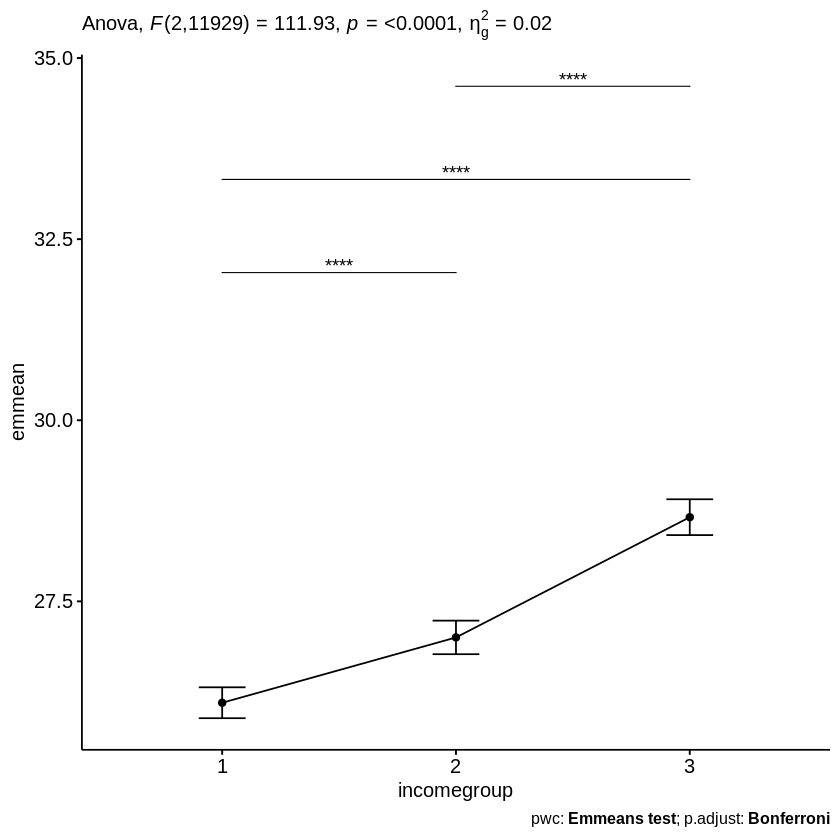

In [ ]:
# Visualization: line plots with p-values
pwc <- pwc %>% add_xy_position(x = "incomegroup", fun = "mean_se")
ggline(get_emmeans(pwc), x = "incomegroup", y = "emmean") +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2) +
  stat_pvalue_manual(pwc, hide.ns = TRUE, tip.length = FALSE) +
  labs(
    subtitle = get_test_label(res.aov, detailed = TRUE),
    caption = get_pwc_label(pwc)
  )


Overall, these results suggest that 'incomegroup' interacts significantly with 'fallgeneralknowledgescore' in affecting 'fallmathscore', with substantial differences observed between different levels of 'incomegroup'.





